In [2]:
import torch
rcs = torch.load('/mnt/Disk/jiangxiaotian/datasets/RCS_mapsmall/RCSmap_theta90phi330f0.9.pt')[:,:,0]
print(rcs.shape)

torch.Size([361, 720])


In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import torch
import time

tic = time.time()

rcs = torch.load('/mnt/Disk/jiangxiaotian/datasets/RCS_mapsmall/RCSmap_theta90phi330f0.9.pt')[:,:,0]
print(rcs.shape)
rcs_np = rcs.detach().cpu().numpy()

theta = np.linspace(0, 2 * np.pi, rcs_np.shape[1])
phi = np.linspace(0, np.pi, rcs_np.shape[0])
theta, phi = np.meshgrid(theta, phi)

x = rcs_np * np.sin(phi) * np.cos(theta)
y = rcs_np * np.sin(phi) * np.sin(theta)
z = rcs_np * np.cos(phi)

fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, surfacecolor=rcs_np, colorbar=dict(title=dict(side='top',text="RCS/m²"), showexponent='all', showticklabels=True, thickness = 30, tick0 = 0, dtick = 1))])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z"),
        aspectratio=dict(x=1, y=1, z=0.8),
        aspectmode="manual",
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))
    )
)
pio.show(fig)
pio.write_image(fig, 'newRCS.png')
print(f'用时{time.strftime("%H:%M:%S",time.gmtime(time.time()-tic))}')
tic = time.time()

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import torch
import time

tic = time.time()

rcs = torch.load('/mnt/Disk/jiangxiaotian/datasets/RCS_mapsmall/RCSmap_theta90phi330f0.9.pt')[:,:,0]
print(rcs.shape)
rcs_np = rcs.detach().cpu().numpy()

theta = np.linspace(0, 2 * np.pi, rcs_np.shape[1])
phi = np.linspace(0, np.pi, rcs_np.shape[0])
theta, phi = np.meshgrid(theta, phi)

x = rcs_np * np.sin(phi) * np.cos(theta)
y = rcs_np * np.sin(phi) * np.sin(theta)
z = rcs_np * np.cos(phi)

fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, surfacecolor=rcs_np)])

fig.update_layout(
    scene=dict(
        xaxis=dict(title="X"),
        yaxis=dict(title="Y"),
        zaxis=dict(title="Z"),
        aspectratio=dict(x=1, y=1, z=0.8),
        aspectmode="manual",
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.7))
    ),
    coloraxis=dict(colorscale="Jet", colorbar=dict(title="RCS/m²")),
)
pio.show(fig)
pio.write_image(fig, './../newRCS.png')
print(f'用时{time.strftime("%H:%M:%S",time.gmtime(time.time()-tic))}')
tic = time.time()

torch.Size([361, 720])


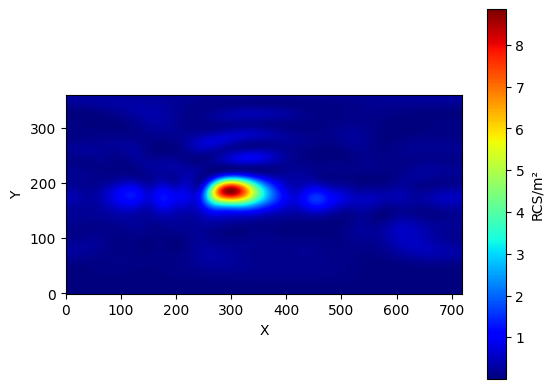

In [ ]:
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

def plot2DRCS(rcs, savedir):
    print(rcs.shape)

    vmin = torch.min(rcs)
    vmax = torch.max(rcs)
    norm = Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.jet

    plt.figure()
    plt.imshow(rcs, cmap=cmap, norm=norm, origin='lower')
    plt.colorbar(label='RCS/m²')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.savefig(savedir)
    # plt.show()

rcs = torch.load(r'/mnt/Disk/jiangxiaotian/datasets/RCS_mapsmall/RCSmap_theta90phi330f0.9.pt')[:,:,0]
plot2DRCS(rcs, '2DRCS.png')

torch.Size([361, 720])


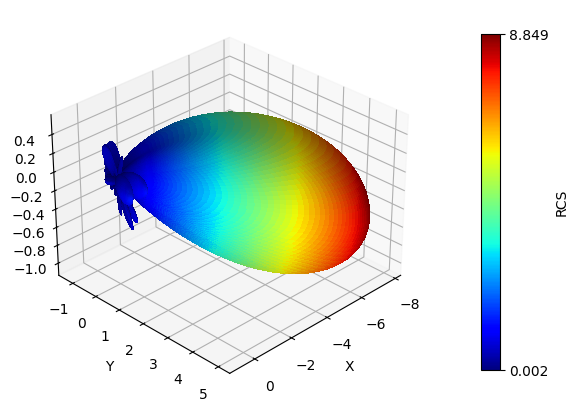

用时00:00:26


In [1]:
import time
import torch
rcs = torch.load(r'/mnt/Disk/jiangxiaotian/datasets/RCS_mapsmall/RCSmap_theta90phi330f0.9.pt')[:,:,0]
print(rcs.shape)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

tic = time.time()

theta = np.linspace(0, 2 * np.pi, rcs.shape[1])  # 调整 shape[1]
phi = np.linspace(0, np.pi, rcs.shape[0])  # 调整 shape[0]
theta, phi = np.meshgrid(theta, phi)

x = rcs * np.sin(phi) * np.cos(theta)
y = rcs * np.sin(phi) * np.sin(theta)
z = rcs * np.cos(phi)

vmin = torch.min(rcs)
vmax = torch.max(rcs)
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = cm.jet
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cmap(norm(rcs)), linewidth=0, antialiased=False)
ax.view_init(elev=30, azim=45)
fig.subplots_adjust(left=0, right=0.9, bottom=0.1, top=0.9)

cax = fig.add_axes([0.85, 0.15, 0.03, 0.7])  # 调整位置和大小
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), shrink=0.5, aspect=10, cax=cax)
cb.set_ticks([vmin, vmax])  # 设置colorbar显示的刻度值为真实值范围
cb.set_label('RCS')  # 设置colorbar标签

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

print(f'用时{time.strftime("%H:%M:%S",time.gmtime(time.time()-tic))}')
tic = time.time()

torch.Size([361, 720])


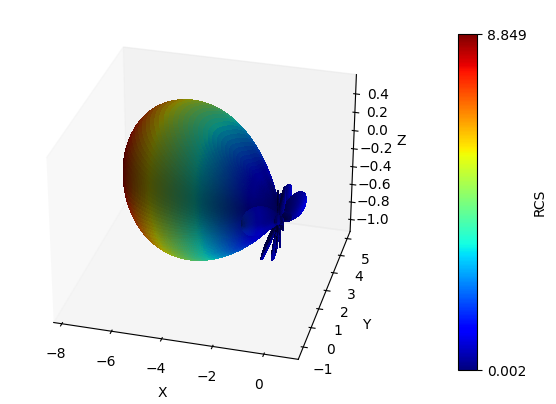

In [50]:
import torch
rcs = torch.load(r'/mnt/Disk/jiangxiaotian/datasets/RCS_mapsmall/RCSmap_theta90phi330f0.9.pt')[:,:,0]
print(rcs.shape)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

theta = np.linspace(0, 2 * np.pi, rcs.shape[1])  # 调整 shape[1]
phi = np.linspace(0, np.pi, rcs.shape[0])  # 调整 shape[0]
theta, phi = np.meshgrid(theta, phi)

x = rcs * np.sin(phi) * np.cos(theta)
y = rcs * np.sin(phi) * np.sin(theta)
z = rcs * np.cos(phi)

vmin = torch.min(rcs)
vmax = torch.max(rcs)
norm = Normalize(vmin=vmin, vmax=vmax)
cmap = cm.jet
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=cmap(norm(rcs)), linewidth=0, antialiased=False)
# ax.view_init(elev=15, azim=-75) #elev是xy平面夹角上为正 azim是x轴正向夹角顺时针为正
ax.view_init(azim=-75)
fig.subplots_adjust(left=0, right=0.9, bottom=0.1, top=0.9)

ax.grid(False)  # 关闭基准平面网格显示
# ax.plot([0, 1.1 * x.max()], [0, 0], [0, 0], color='black', linewidth=1.5)  # x轴
# ax.plot([0, 0], [0, 1.1 * y.max()], [0, 0], color='black', linewidth=1.5)  # y轴
# ax.plot([0, 0], [0, 0], [0, 1.1 * z.max()], color='black', linewidth=1.5)  # z轴
# ax.quiver(0, 0, 0, 1, 0, 0, color='black', linewidth=1.5)  # x轴
# ax.quiver(0, 0, 0, 0, 1, 0, color='black', linewidth=1.5)  # y轴
# ax.quiver(0, 0, 0, 0, 0, 1, color='black', linewidth=1.5)  # z轴

cax = fig.add_axes([0.85, 0.15, 0.03, 0.7])  # 调整位置和大小
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), shrink=0.5, aspect=10, cax=cax)
cb.set_ticks([vmin, vmax])  # 设置colorbar显示的刻度值为真实值范围
cb.set_label('RCS')  # 设置colorbar标签

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

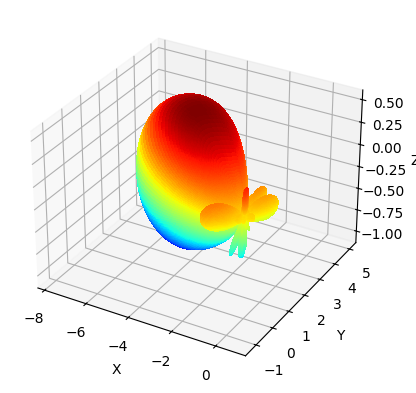

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的数据矩阵
matrix = rcs  # 替换为你的实际数据矩阵

# 构建 theta 和 phi 的网格
theta = np.linspace(0, 2 * np.pi, matrix.shape[1])  # 调整 shape[1]
phi = np.linspace(0, np.pi, matrix.shape[0])  # 调整 shape[0]
theta, phi = np.meshgrid(theta, phi)

# 将极坐标转换为笛卡尔坐标
x = matrix * np.sin(phi) * np.cos(theta)
y = matrix * np.sin(phi) * np.sin(theta)
z = matrix * np.cos(phi)

# 绘制极坐标系的3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="jet", linewidth=0, antialiased=False)

# 设置坐标轴标签
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 显示图形
plt.show()

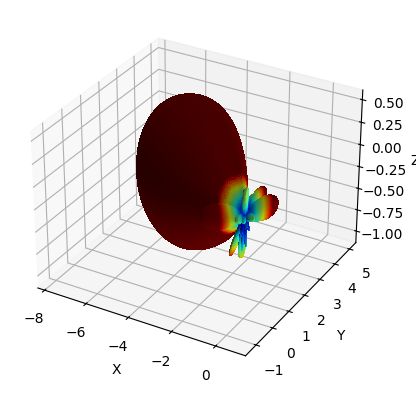

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的数据矩阵
matrix = rcs  # 替换为你的实际数据矩阵

# 构建 theta 和 phi 的网格
theta = np.linspace(0, 2 * np.pi, matrix.shape[1])  # 调整 shape[1]
phi = np.linspace(0, np.pi, matrix.shape[0])  # 调整 shape[0]
theta, phi = np.meshgrid(theta, phi)

# 将极坐标转换为笛卡尔坐标
x = matrix * np.sin(phi) * np.cos(theta)
y = matrix * np.sin(phi) * np.sin(theta)
z = matrix * np.cos(phi)

# 绘制极坐标系的3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.jet(rcs), linewidth=0, antialiased=False)

# 设置坐标轴标签
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 显示图形
plt.show()

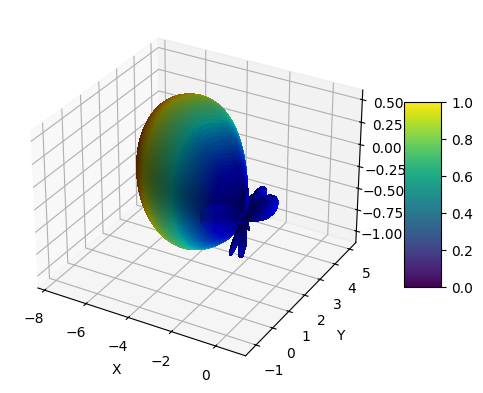

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的数据矩阵
matrix = rcs  # 替换为你的实际数据矩阵

# 构建 theta 和 phi 的网格
theta = np.linspace(0, 2 * np.pi, matrix.shape[1])  # 调整 shape[1]
phi = np.linspace(0, np.pi, matrix.shape[0])  # 调整 shape[0]
theta, phi = np.meshgrid(theta, phi)

rmax = torch.max(matrix)
rmin = torch.min(matrix)
norm_r = (matrix - rmin) / (rmax - rmin)
# 将极坐标转换为笛卡尔坐标
x = matrix * np.sin(phi) * np.cos(theta)
y = matrix * np.sin(phi) * np.sin(theta)
z = matrix * np.cos(phi)

# 绘制极坐标系的3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.jet(norm_r), linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

# 设置坐标轴标签
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 显示图形
plt.show()

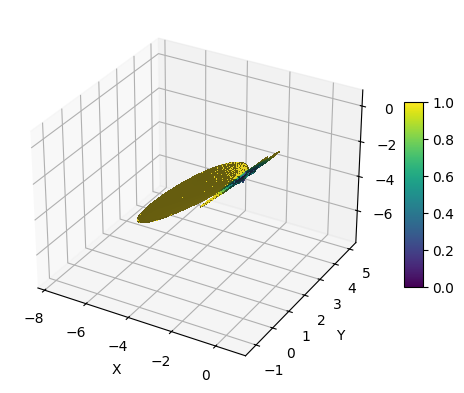

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的数据矩阵
matrix = rcs  # 替换为你的实际数据矩阵

# 构建 theta 和 phi 的网格
theta = np.linspace(0, np.pi, matrix.shape[0])  # 调整 shape[1]
phi = np.linspace(0, 2*np.pi, matrix.shape[1])  # 调整 shape[0]
theta, phi = np.meshgrid(theta, phi)

# rmax = torch.max(matrix)
# rmin = torch.min(matrix)
# norm_r = (matrix - rmin) / (rmax - rmin)

# 将极坐标转换为笛卡尔坐标
x = matrix * np.cos(phi.T) * np.sin(theta.T)
y = matrix * np.sin(phi.T) * np.sin(theta.T)
z = matrix * np.cos(phi.T)

# 绘制极坐标系的3D图形
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.viridis(matrix), linewidth=0, antialiased=False)
# fig.colorbar(surf, shrink=0.5, aspect=10)

# 设置坐标轴标签
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 显示图形
plt.show()

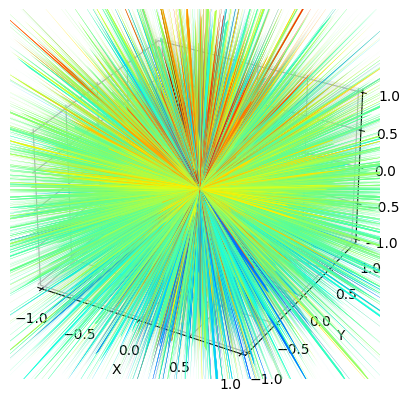

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设的数据矩阵
matrix = torch.randn(361, 720)  # 替换为你的实际数据矩阵

# 构建 theta 和 phi 的网格
theta = np.linspace(0, 2 * np.pi, matrix.shape[1])
phi = np.linspace(0, np.pi, matrix.shape[0])
theta, phi = np.meshgrid(theta, phi)

# 将极坐标转换为笛卡尔坐标
r = matrix
x = r * np.sin(phi) * np.cos(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(phi)

# 绘制3D极坐标系图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 将笛卡尔坐标转换为极坐标
ax.plot_surface(x, y, z, cmap='jet')

# 设置坐标轴范围
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# 设置坐标轴刻度
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

# 设置坐标轴标签
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 显示图形
plt.show()

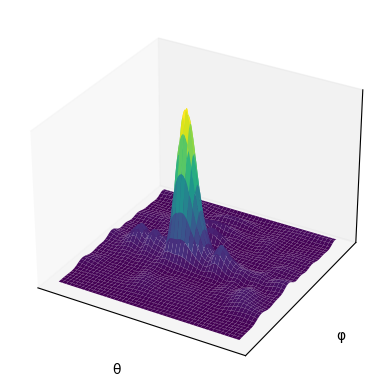

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 假设数据存储在名为data的numpy数组中
data = rcs

# 将极坐标转换为笛卡尔坐标
theta = np.linspace(0, 2 * np.pi, data.shape[1])
phi = np.linspace(0, np.pi, data.shape[0])
theta, phi = np.meshgrid(theta, phi)
r = data

# 创建3D图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制3D极坐标系图
ax.plot_surface(theta, phi, r, cmap='viridis')

# 设置坐标轴标签
ax.set_xlabel('θ')
ax.set_ylabel('φ')
ax.set_zlabel('r')

# 隐藏坐标轴刻度
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# 显示图形
plt.show()

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 输入数据的形状是 torch.Size([361, 720]),对应theta和phi轴的步长

theta = np.linspace(0, 2*np.pi, 361) 
phi = np.linspace(0, np.pi, 720)

R, THETA, PHI = np.meshgrid(rcs, theta, phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(R, THETA, PHI, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')

# 设置坐标轴名称  
ax.set_theta_label('θ')
ax.set_phi_label('φ')
ax.set_rlabel('RCS')

# 隐藏xyz坐标轴 
ax.set_axis_off()

plt.show()

MemoryError: Unable to allocate 252. GiB for an array with shape (361, 259920, 720) and data type float32

AttributeError: 'Axes3D' object has no attribute 'set_theta_label'

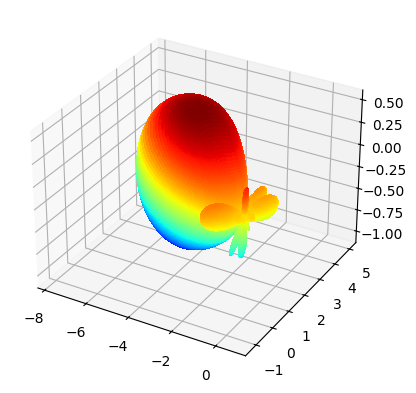

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的数据矩阵
matrix = rcs  # 替换为你的实际数据矩阵

# 构建 theta 和 phi 的网格
theta = np.linspace(0, 2 * np.pi, matrix.shape[1])  # 调整 shape[1]
phi = np.linspace(0, np.pi, matrix.shape[0])  # 调整 shape[0]
theta, phi = np.meshgrid(theta, phi)

# 将极坐标转换为笛卡尔坐标
x = matrix * np.sin(phi) * np.cos(theta)
y = matrix * np.sin(phi) * np.sin(theta)
z = matrix * np.cos(phi)

# 绘制极坐标系的3D图形
fig = plt.figure() 
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="jet", linewidth=0, antialiased=False)

# 设置坐标轴标签为极坐标系
ax.set_theta_label("Theta")  
ax.set_phi_label("Phi")
ax.set_rlabel("R")

# 隐藏坐标轴
ax.set_axis_off()

plt.show()